Using device: cuda

Round 1:
Data size: 2000 bytes
Main iterations: 160, Sub-network iterations: 80
Storage Capacity: 3180 bytes (25440 bits)
Execution time: 0.30 seconds
Total points: 12721
Encoding/Decoding success: True

Growth for next round:
Main iterations: 184
Sub-network iterations: 113


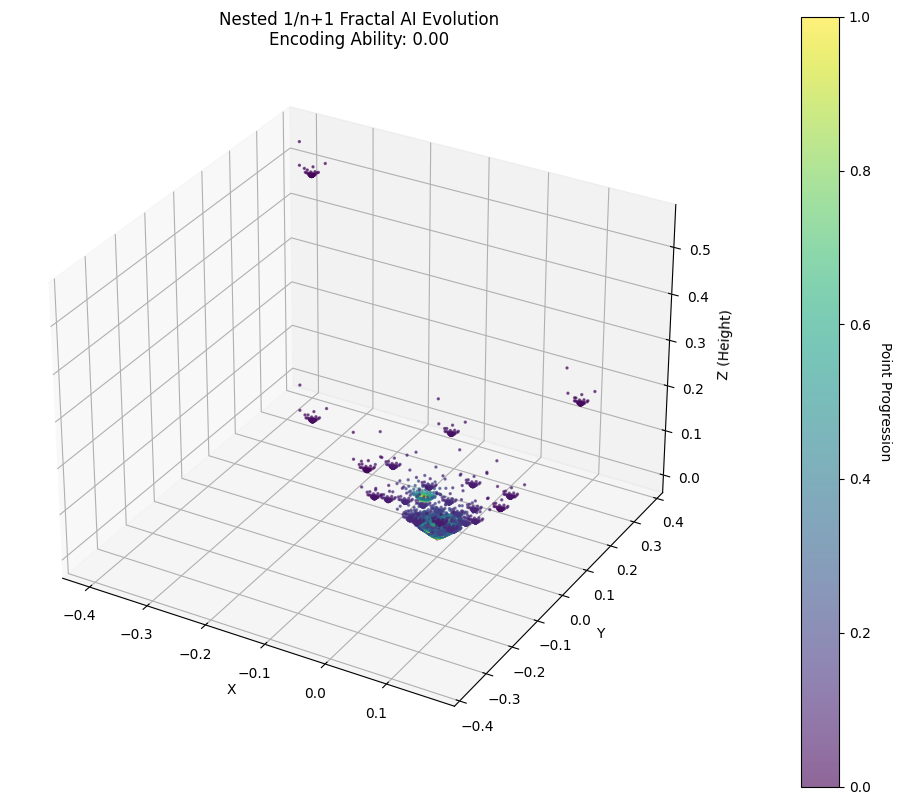


Round 2:
Data size: 4000 bytes
Main iterations: 184, Sub-network iterations: 113
Storage Capacity: 5170 bytes (41360 bits)
Execution time: 0.59 seconds
Total points: 20680
Encoding/Decoding success: True

Growth for next round:
Main iterations: 218
Sub-network iterations: 159


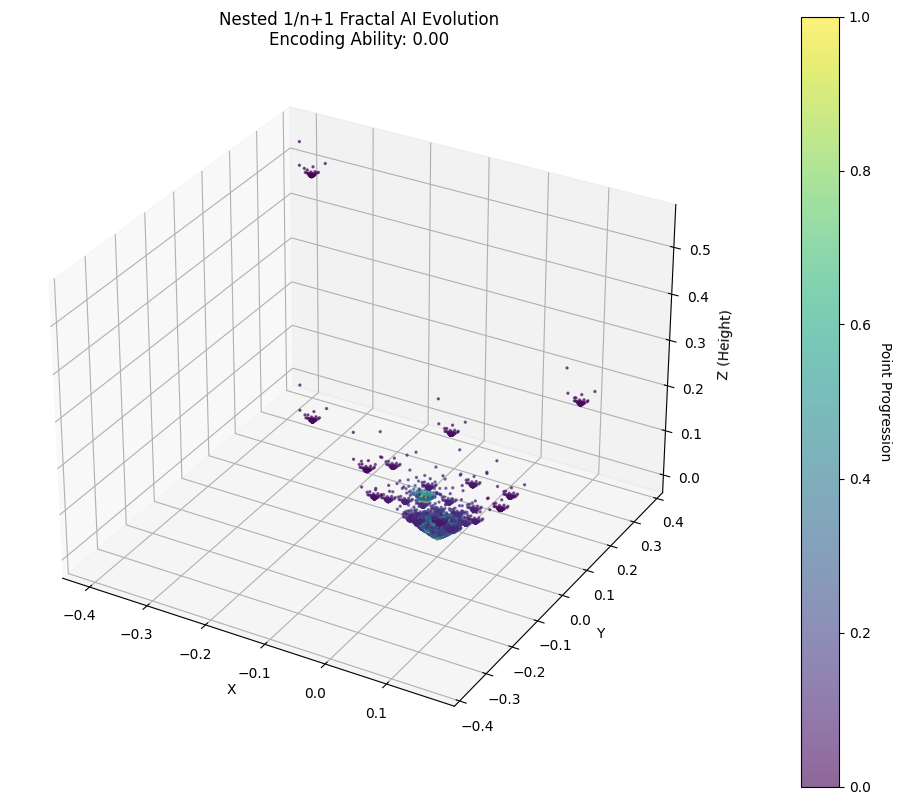


Round 3:
Data size: 8000 bytes
Main iterations: 218, Sub-network iterations: 159
Storage Capacity: 8626 bytes (69008 bits)
Execution time: 1.37 seconds
Total points: 34504
Encoding/Decoding success: True

Growth for next round:
Main iterations: 266
Sub-network iterations: 224


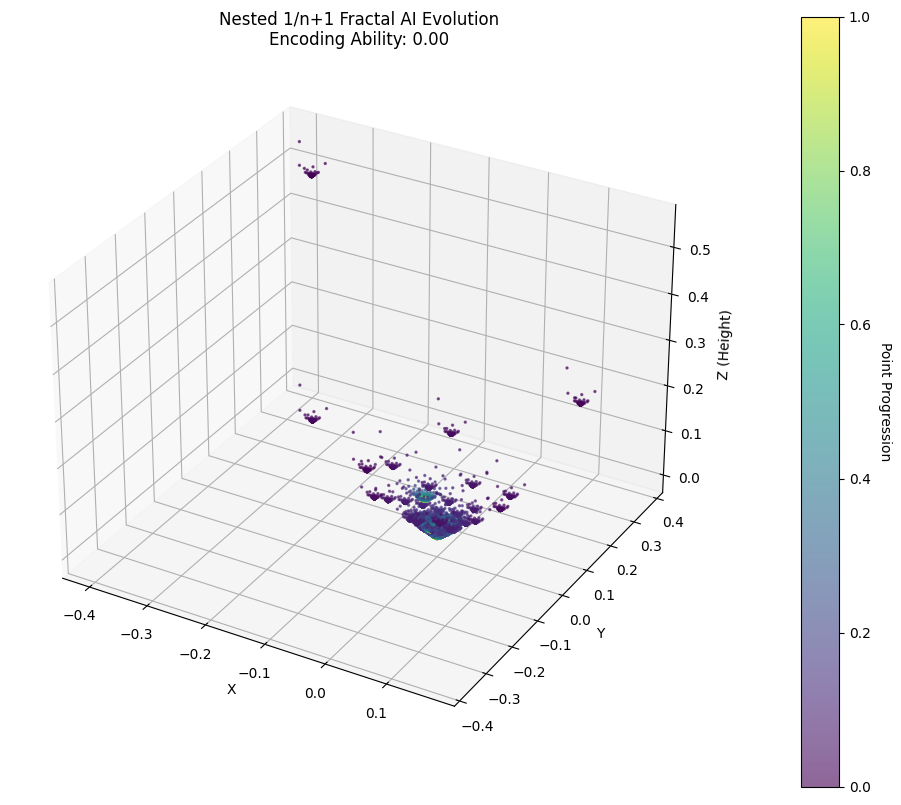


Round 4:
Data size: 16000 bytes
Main iterations: 266, Sub-network iterations: 224
Storage Capacity: 14840 bytes (118720 bits)
Execution time: 2.21 seconds
Total points: 59361
Encoding/Decoding success: True

Growth for next round:
Main iterations: 334
Sub-network iterations: 316


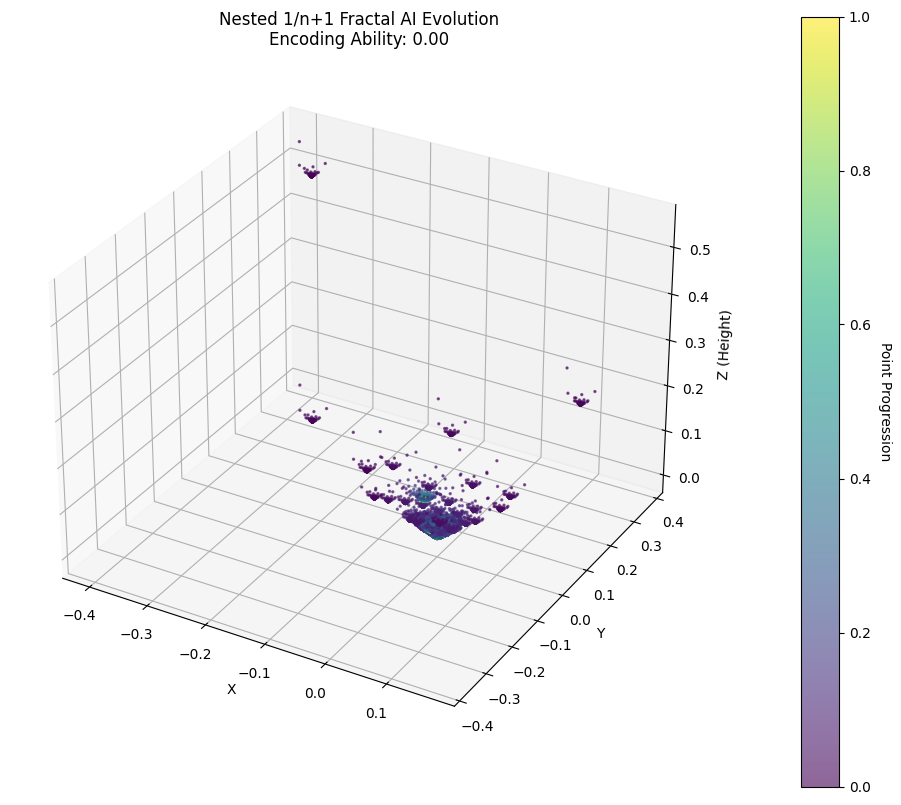


Round 5:
Data size: 32000 bytes
Main iterations: 334, Sub-network iterations: 316
Storage Capacity: 26307 bytes (210456 bits)
Execution time: 4.24 seconds
Total points: 105229
Encoding/Decoding success: True

Growth for next round:
Main iterations: 430
Sub-network iterations: 446


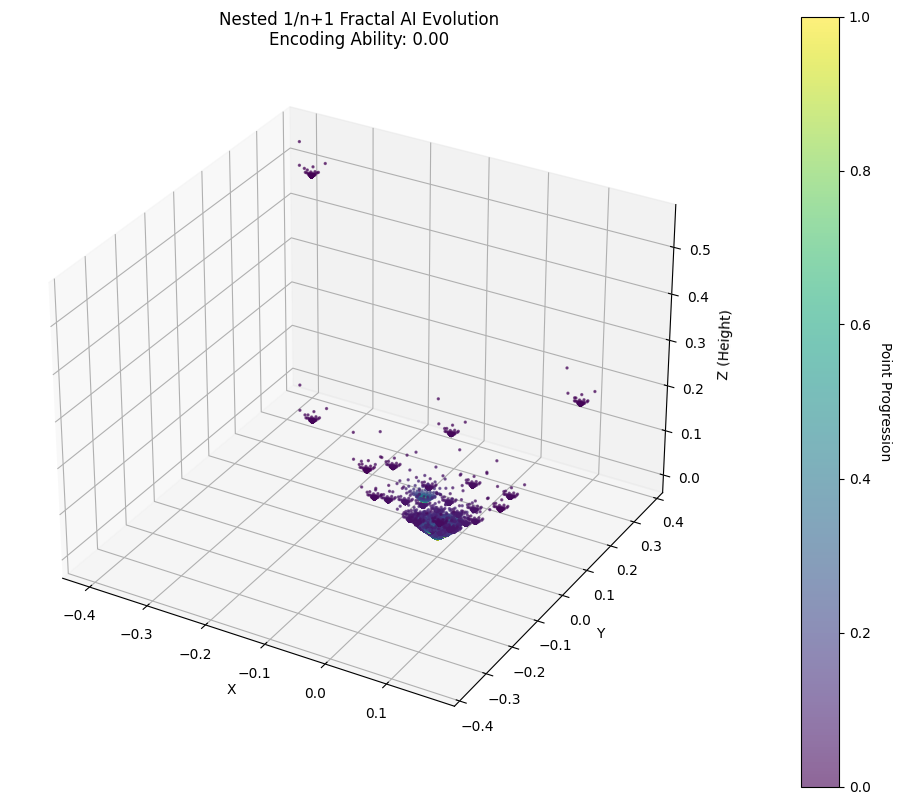


Round 6:
Data size: 64000 bytes
Main iterations: 430, Sub-network iterations: 446
Storage Capacity: 47833 bytes (382664 bits)
Execution time: 9.18 seconds
Total points: 191335
Encoding/Decoding success: False
Encoding/Decoding failed. Increasing iterations more aggressively.

Growth for next round:
Main iterations: 645
Sub-network iterations: 669


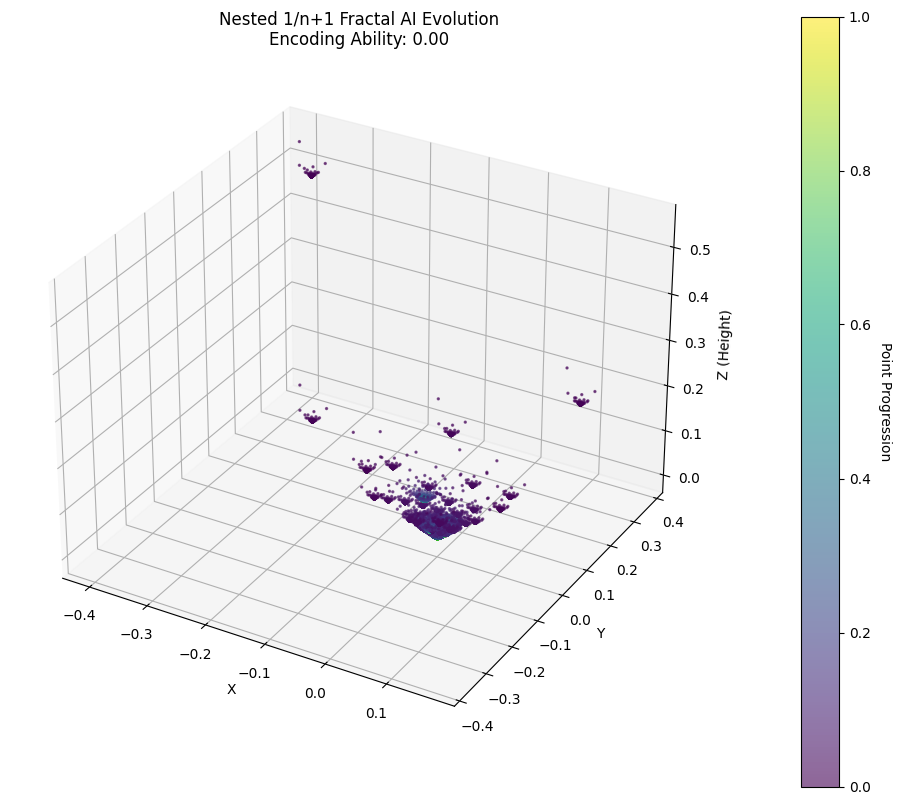


Round 7:
Data size: 128000 bytes
Main iterations: 645, Sub-network iterations: 669
Storage Capacity: 107709 bytes (861672 bits)
Execution time: 18.31 seconds
Total points: 430837
Encoding/Decoding success: True

Growth for next round:
Main iterations: 870
Sub-network iterations: 946


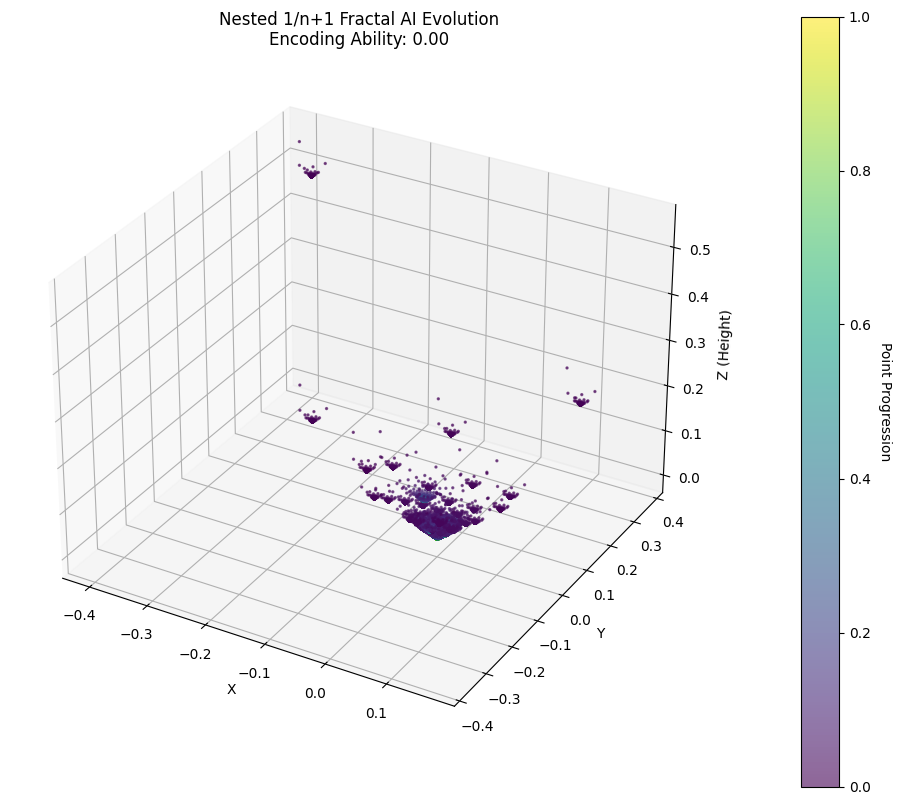


Round 8:
Data size: 256000 bytes
Main iterations: 870, Sub-network iterations: 946
Storage Capacity: 205518 bytes (1644144 bits)
Execution time: 36.76 seconds
Total points: 822075
Encoding/Decoding success: True

Growth for next round:
Main iterations: 1188
Sub-network iterations: 1337


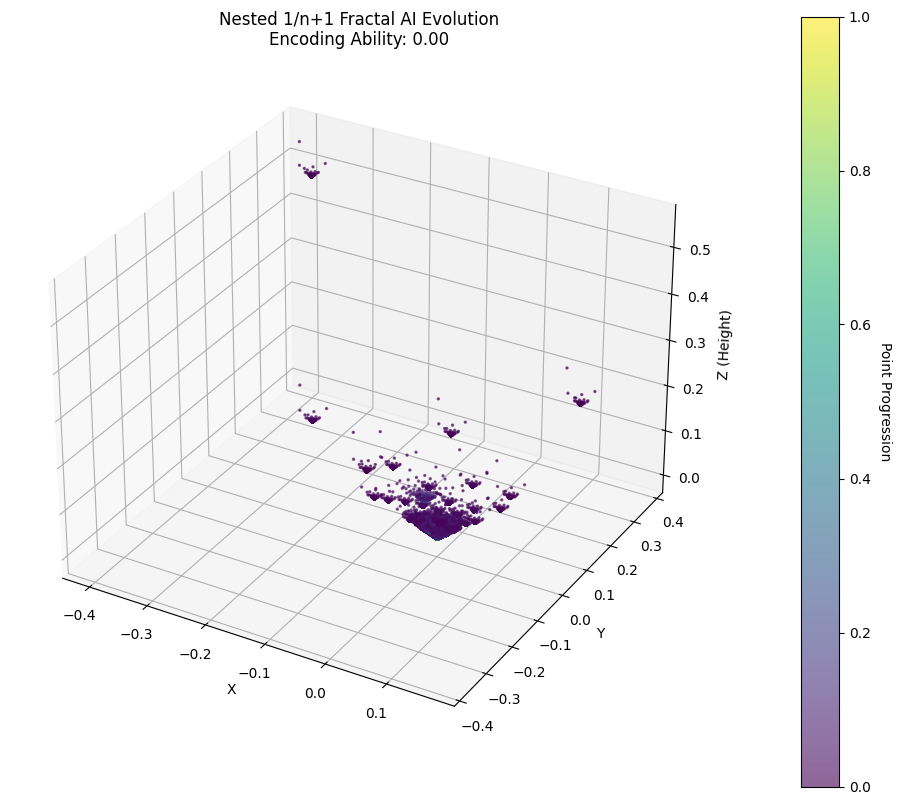


Round 9:
Data size: 512000 bytes
Main iterations: 1188, Sub-network iterations: 1337
Storage Capacity: 396755 bytes (3174040 bits)
Execution time: 70.85 seconds
Total points: 1587020
Encoding/Decoding success: True

Growth for next round:
Main iterations: 1638
Sub-network iterations: 1890


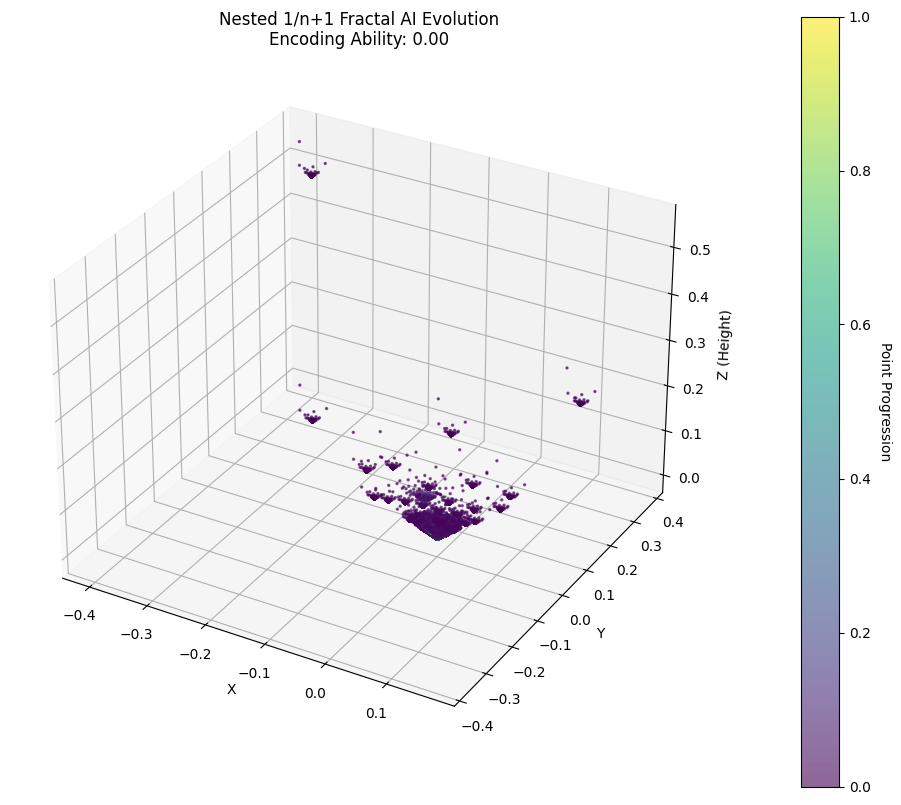


Round 10:
Data size: 1024000 bytes
Main iterations: 1638, Sub-network iterations: 1890
Storage Capacity: 773482 bytes (6187856 bits)
Execution time: 144.42 seconds
Total points: 3093931
Encoding/Decoding success: True

Growth for next round:
Main iterations: 2275
Sub-network iterations: 2672


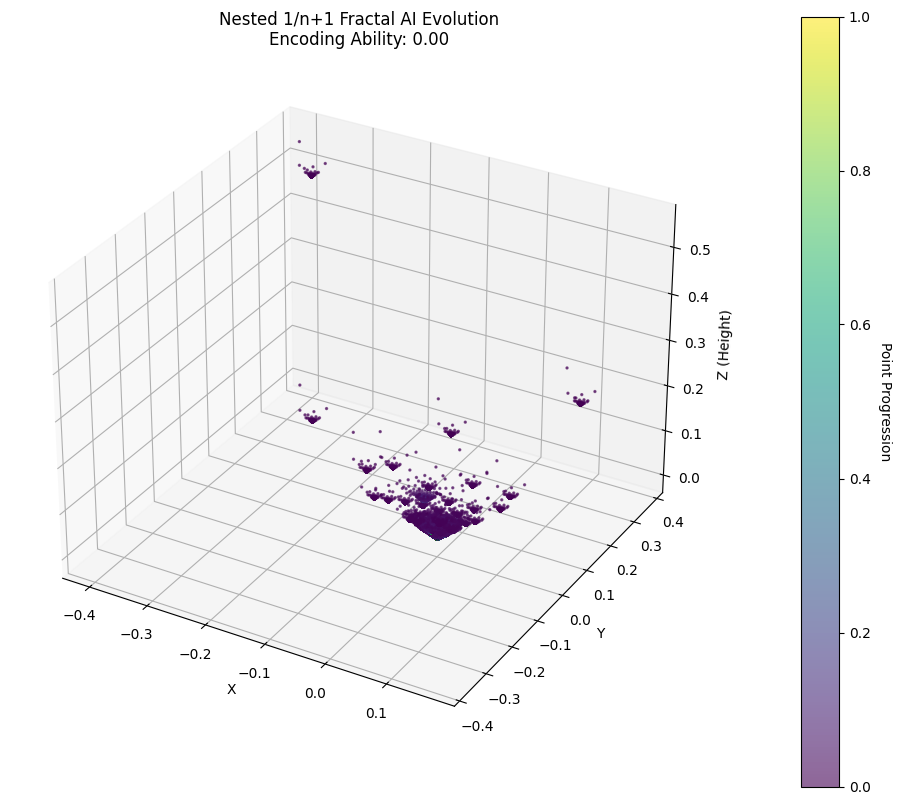

In [9]:

# nested 1/n+1 fractal AI system

import matplotlib.pyplot as plt
import numpy as np
import torch
import time
import random
import string
from mpl_toolkits.mplot3d import Axes3D

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class SyntheticAI:
    def __init__(self):
        self.encoding_ability = torch.tensor([0.0], device=device)
        self.decoding_ability = torch.tensor([0.0], device=device)

    def train(self):
        self.encoding_ability += torch.rand(1, device=device) * 0.01
        self.decoding_ability += torch.rand(1, device=device) * 0.01

    def encode(self, data):
        return (data + self.encoding_ability) % 256

    def decode(self, encoded_data):
        return (encoded_data - self.decoding_ability) % 256

def generate_1n1_structure(center, radius, iterations):
    points = [center]
    for i in range(1, iterations):
        angle = i * np.pi * (3 - np.sqrt(5))  # Golden angle
        r = radius / (i + 1)  # 1/n+1 growth
        x = center[0] + r * np.cos(angle)
        y = center[1] + r * np.sin(angle)
        z = center[2] + r
        points.append((x, y, z))
    return points

def generate_nested_1n1_fractal(iterations, substructure_iterations):
    all_points = []
    main_points = generate_1n1_structure((0, 0, 0), 1, iterations)
    all_points.extend(main_points)

    for point in main_points[1:]:  # Skip the center point
        substructure = generate_1n1_structure(point, 0.1, substructure_iterations)
        all_points.extend(substructure[1:])  # Skip the first point as it's the same as the main point

    return all_points

def plot_nested_1n1_fractal(points, ai):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    x, y, z = zip(*points)

    # Plot points
    colors = plt.cm.viridis(np.linspace(0, 1, len(points)))
    scatter = ax.scatter(x, y, z, c=colors, s=2, alpha=0.6)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z (Height)')
    plt.title(f"Nested 1/n+1 Fractal AI Evolution\nEncoding Ability: {ai.encoding_ability.item():.2f}")

    # Add colorbar to show progression
    cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.1)
    cbar.set_label('Point Progression', rotation=270, labelpad=15)

    return fig

def encode_data_with_error_correction(data, points, ai):
    data_tensor = torch.tensor([int(b) for b in data], dtype=torch.float32, device=device)
    encoded_data = []
    chunk_size = 3  # Store each byte 3 times for redundancy
    for i in range(0, len(data_tensor), chunk_size):
        chunk = data_tensor[i:i+chunk_size]
        for byte in chunk:
            if len(encoded_data) < len(points):
                encoded_value = ai.encode(byte)
                encoded_data.extend([(points[len(encoded_data)], encoded_value)] * 3)  # Store 3 times
    return encoded_data

def decode_data_with_error_correction(encoded_data, ai):
    decoded_data = []
    chunk_size = 3
    for i in range(0, len(encoded_data), chunk_size * 3):
        chunk = encoded_data[i:i+chunk_size*3]

        # Decode each byte (taking average of 3 repetitions)
        for j in range(0, len(chunk), 3):
            byte_values = [ai.decode(chunk[j+k][1]).item() for k in range(3) if j+k < len(chunk)]
            decoded_byte = int(sum(byte_values) / len(byte_values))
            decoded_data.append(decoded_byte)

    return bytes(decoded_data)

def calculate_storage_capacity(points):
    total_points = len(points)
    usable_points = total_points * 3 // 4  # 1/4 of points used for error correction
    byte_capacity = usable_points // 3  # Each byte stored 3 times
    bit_capacity = byte_capacity * 8

    return byte_capacity, bit_capacity

def generate_random_data(size):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=size)).encode('utf-8')

def evolve_fractal(rounds):
    data_size = 2000  # Start with 2KB
    main_iterations = 160
    sub_iterations = 80

    for round in range(rounds):
        print(f"\nRound {round + 1}:")
        start_time = time.time()

        ai = SyntheticAI()
        points = generate_nested_1n1_fractal(main_iterations, sub_iterations)

        sample_data = generate_random_data(data_size)
        encoded_data = encode_data_with_error_correction(sample_data, points, ai)
        decoded_data = decode_data_with_error_correction(encoded_data, ai)

        byte_capacity, bit_capacity = calculate_storage_capacity(points)

        end_time = time.time()
        execution_time = end_time - start_time

        success = sample_data == decoded_data

        print(f"Data size: {len(sample_data)} bytes")
        print(f"Main iterations: {main_iterations}, Sub-network iterations: {sub_iterations}")
        print(f"Storage Capacity: {byte_capacity} bytes ({bit_capacity} bits)")
        print(f"Execution time: {execution_time:.2f} seconds")
        print(f"Total points: {len(points)}")
        print(f"Encoding/Decoding success: {success}")

        # Evolve for next round
        data_size *= 2

        if not success:
            print("Encoding/Decoding failed. Increasing iterations more aggressively.")
            main_growth = int(1.5 * main_iterations)  # 50% increase
            sub_growth = int(1.5 * sub_iterations)    # 50% increase
        else:
            # Original growth strategy for successful rounds
            main_growth = int(np.sqrt(2) * (main_iterations - 100) + 100)
            sub_growth = int(np.sqrt(2) * sub_iterations)

        print(f"\nGrowth for next round:")
        print(f"Main iterations: {main_growth}")
        print(f"Sub-network iterations: {sub_growth}")

        # Update iterations for next round
        main_iterations = main_growth
        sub_iterations = sub_growth

        # Plot the fractal structure
        fig = plot_nested_1n1_fractal(points, ai)
        plt.show()

def main():
    evolve_fractal(rounds=10)  # Run for 5 rounds of evolution

if __name__ == "__main__":
    main()

# To run this code, execute this cell in a GPU-enabled Colab notebook.